<a href="https://colab.research.google.com/github/StillWork/ds-lab/blob/master/gg_17(1)_%EB%8D%B0%EC%9D%B4%ED%84%B0%ED%83%90%EC%83%89_%ED%81%B4%EB%9F%AC%EC%8A%A4%ED%84%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 다중회귀와 다중분류

- 타겟변수 y가 하나의 값을 갖는 것이 아니라 다수의 값을 갖는 경우
- 회귀와 분류
 - 출력이 벡터 형태로 다수의 아나로그 값을 갖는 경우
 - 출력이 남여 구분이 아니라 국적 구분도 해야 하는 경우(multi-class output)

# 다중 회귀 예측

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## 데이터 생성
- 시스템의 입력과 출력 데이터 생성 함수
- y가 복수의 숫자로 구성된 경우

In [19]:
import scipy.stats
def gen_random_xy(n_steps=50, show=False):
    level = 0.5 + np.random.rand() # 0 ~ 1.5 사이의 임의의 크기 생성
    nd = scipy.stats.norm(3, 1) # 정규 분포 입력
    xs = np.linspace(0,6,n_steps)
    in_x = level*(nd.pdf(xs) + 0.02*np.random.rand(n_steps))
    out = np.cumsum(in_x) + 0.2*np.random.rand(n_steps)
    if show:
        print('random lebel=', level)
        plt.plot(in_x) ; plt.show()
        plt.plot(out); plt.show()
    return in_x, out

random lebel= 0.6008585910452217


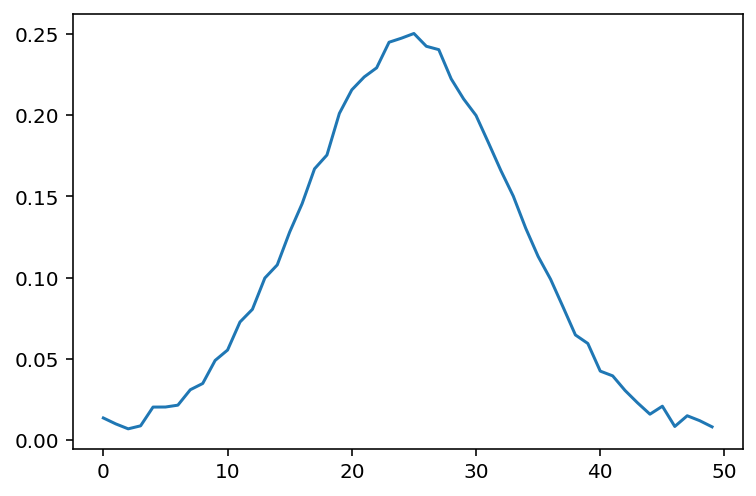

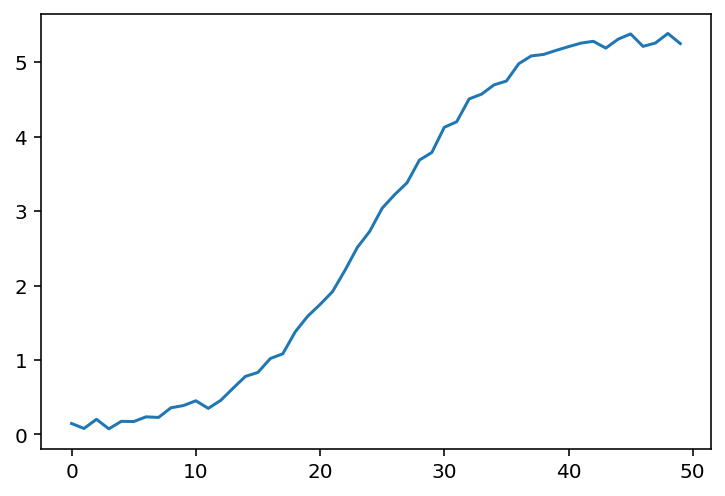

In [20]:
_= gen_random_xy(show=True)

In [21]:
# 입력 및 출력 데이터 샘플 생성
N = 200 # 샘플 수
n_steps = 50
X, y = [],[]
for i in range(N):
    in_x, out = gen_random_xy(n_steps)
    X.append(in_x)
    y.append(out)
X = np.array(X)
y = np.array(y)

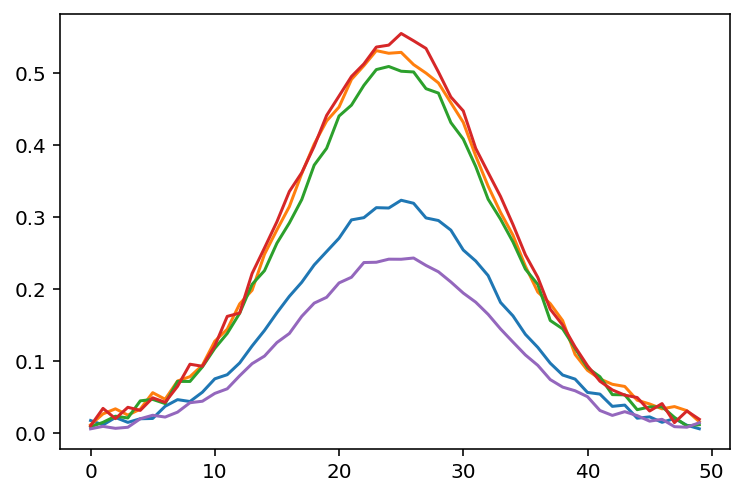

In [66]:
for i in range(5):
    plt.plot(X[i])

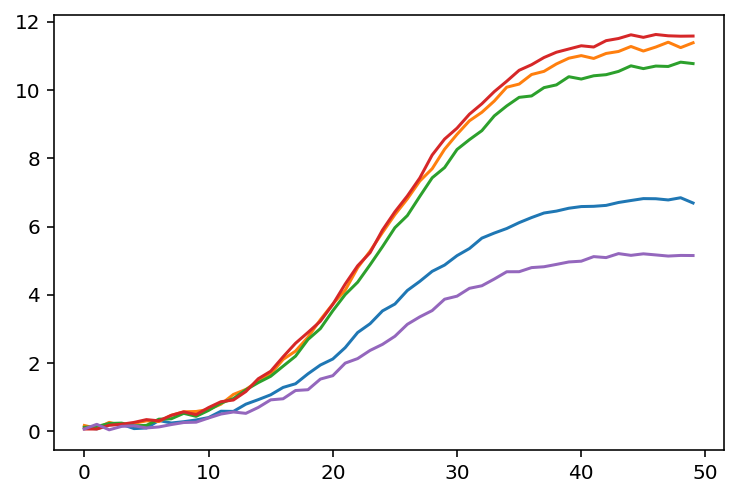

In [67]:
for i in range(5):
    plt.plot(y[i])

In [24]:
X.shape, y.shape

((200, 50), (200, 50))

In [25]:
X_all = X.copy()

### 모든 데이터 샘플을 사용한 다중회귀 예측

In [27]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X_all, y, random_state=9)

In [28]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=20)
rfr.fit(X_train, y_train)
rfr.score(X_test, y_test)

0.8263532246803524

In [29]:
y_pred = rfr.predict(X_test)

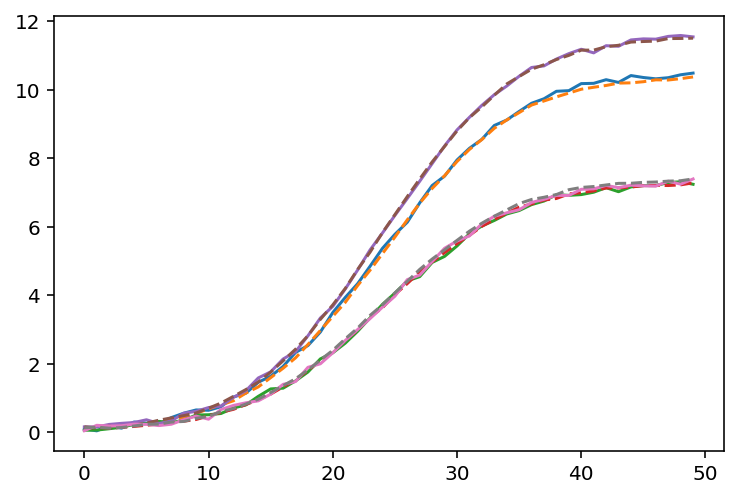

In [72]:
for i in range(4):
    plt.plot(y_test[i])
    plt.plot(y_pred[i], '--')

### 입력으로 50개가 아닌 일부 샘플만 사용하는 경우

In [34]:
X.shape

(200, 50)

In [74]:
# 일부 샘플 수
n_interval = 5
xn = np.int(n_steps/n_interval)
x_sample = [xn*(i+1)-1 for i in range(n_interval)]
x_sample

[9, 19, 29, 39, 49]

In [75]:
# 해당 샘플 컬럼만으로 입력 재구성
X_part = X[:,x_sample]
print(X_part.shape)
X_part[:3]

(200, 5)


array([[0.0561607 , 0.25163781, 0.2813836 , 0.07437013, 0.00533796],
       [0.09364885, 0.43303855, 0.45845132, 0.1086048 , 0.01511873],
       [0.09132825, 0.39510187, 0.43085728, 0.117224  , 0.01100301]])

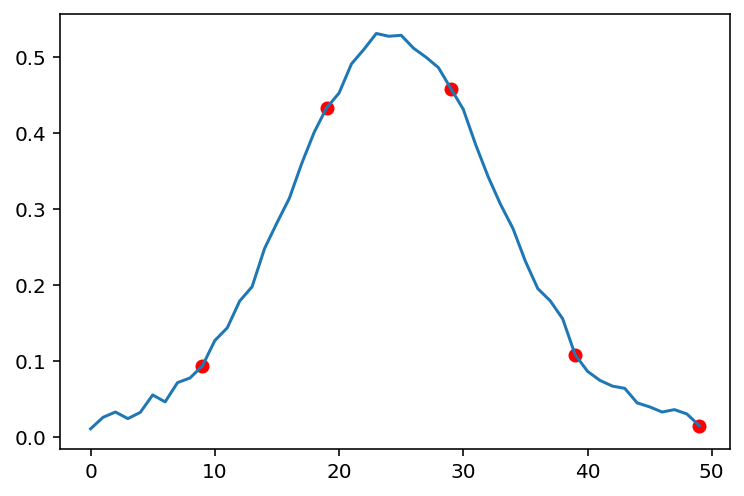

In [76]:
plt.plot(X[1])
plt.scatter(x_sample, X_part[1], c='r')

### 성능 비교

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X_part, y, random_state=9)

In [78]:
rfr = RandomForestRegressor(n_estimators=20)
rfr.fit(X_train, y_train)
rfr.score(X_test, y_test)

0.8130553383629548

In [79]:
X_train.shape

(150, 5)

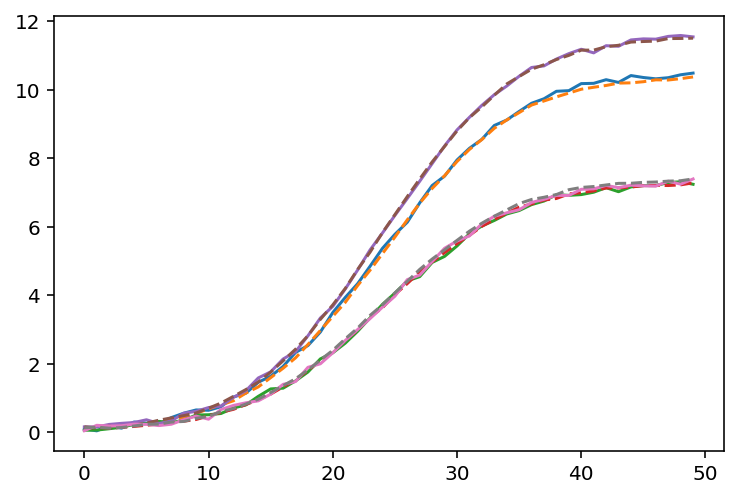

In [80]:
for i in range(4):
    plt.plot(y_test[i])
    plt.plot(y_pred[i], '--')

In [81]:
X_test.shape

(50, 5)

# 다중 분류
- multi-class output 모델
- y로 단일 값이 아니라 아래와 같이 다중 값을 사용
 - y_multi = np.c_[y1, y2] 또는
 - y_multi = np.stack((y1,y2)).T 사용
 
## kNN, 결정트리, 랜덤 포레스트가 지원
- 다항 로지스틱스를 사용하는 경우
 - model = LogisticRegression(multi_class=“multinomial”, solver = “lbgfs”, C=10)